In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Fetch the absolute path of the file
file_path = os.path.abspath('diabetes.csv')

In [3]:
df = pd.read_csv(file_path)

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

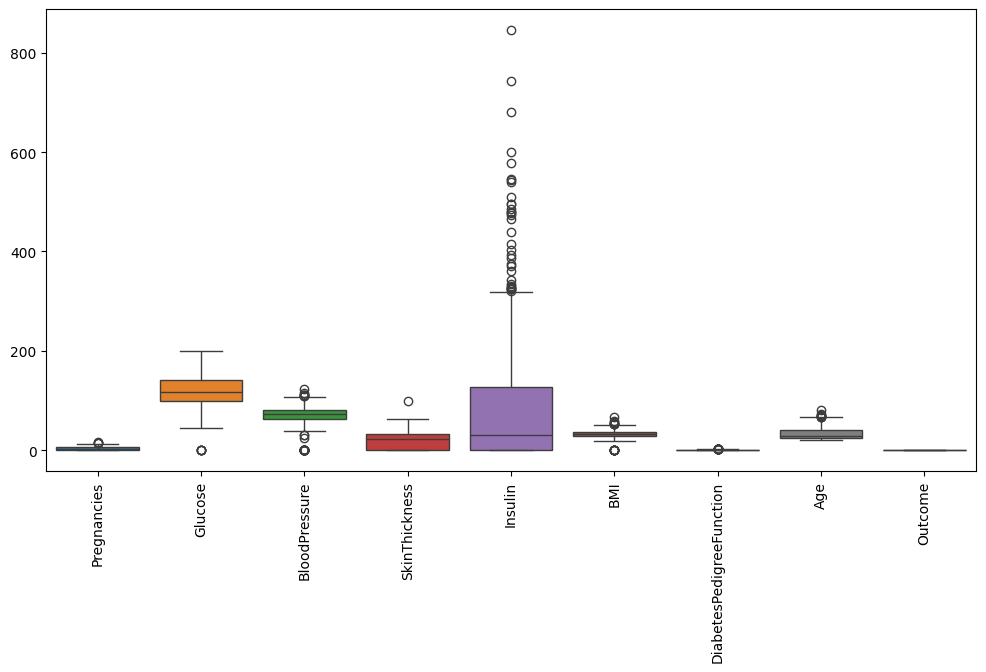

In [9]:
plt.figure(figsize=(12, 6))
# Create a box plot for each column
sns.boxplot(data=df,orient='v')
plt.xticks(rotation=90)
plt.show()

In [10]:
# Calculate the lower and upper bounds for winsorization
glucose_lower_bound = np.percentile(df['Glucose'], 1)  # 1st percentile
skinthickness_upper_bound = np.percentile(df['SkinThickness'], 99)  # 99th percentile

# Apply winsorization
df['Glucose'] = np.where(df['Glucose'] < glucose_lower_bound, glucose_lower_bound, df['Glucose'])
df['SkinThickness'] = np.where(df['SkinThickness'] > skinthickness_upper_bound, skinthickness_upper_bound, df['SkinThickness'])

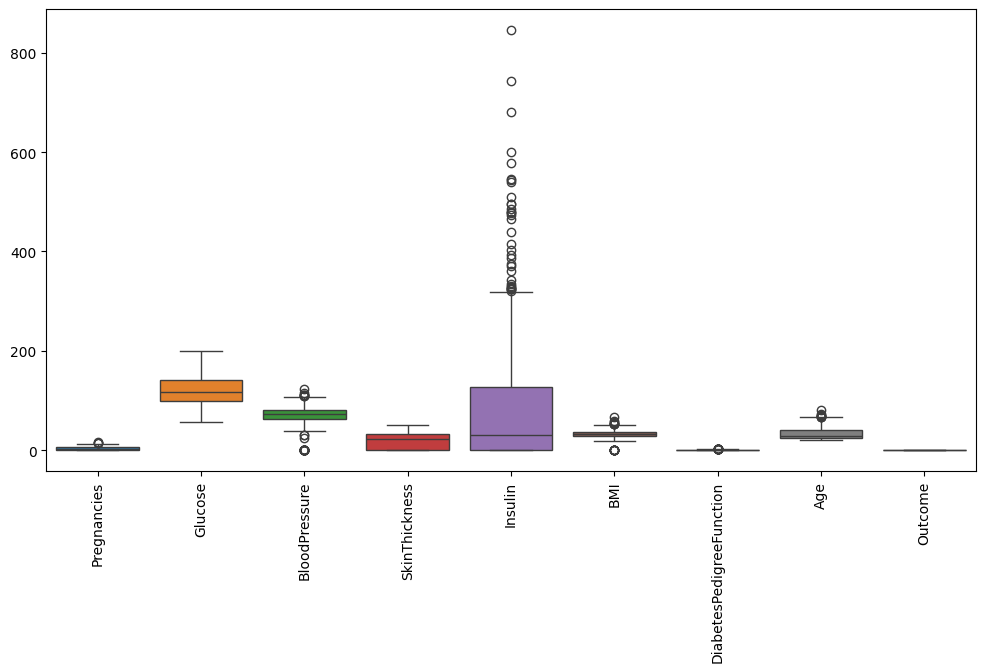

In [11]:
plt.figure(figsize=(12, 6))
# Create a box plot for each column
sns.boxplot(data=df,orient='v')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Function to count outliers in each column
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
    return outliers_count

In [13]:
# Count the number of outliers in each column
outliers_count = count_outliers(df, df.columns)
print("Number of outliers in each column:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Number of outliers in each column:
Pregnancies: 4
Glucose: 0
BloodPressure: 45
SkinThickness: 0
Insulin: 34
BMI: 19
DiabetesPedigreeFunction: 29
Age: 9
Outcome: 0


In [14]:
# Count zero values in each column
zero_df = df.drop('Outcome', axis=1)
zero_counts = (zero_df == 0).sum()

# Print the counts of zero values for all columns
print("Counts of zero values in each column:")
print(zero_counts)

Counts of zero values in each column:
Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [15]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(missing_values=0, strategy='median')

# Columns to be imputed
cols_to_impute = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Apply imputation on the dataset
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [16]:
# Count zero values in each column
zero_df = df.drop('Outcome', axis=1)
zero_counts = (zero_df == 0).sum()

# Print the counts of zero values for all columns
print("Counts of zero values in each column:")
print(zero_counts)

Counts of zero values in each column:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [17]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [18]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
print(X.shape, X_train_scaled.shape, X_test_scaled.shape)

(768, 8) (614, 8) (154, 8)


In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
lr_train_predictions = lr_model.predict(X_train_scaled)
lr_train_accuracy = accuracy_score(y_train, lr_train_predictions)
lr_train_precision = precision_score(y_train, lr_train_predictions, average='binary')
lr_train_recall = recall_score(y_train, lr_train_predictions, average='binary')

lr_test_predictions = lr_model.predict(X_test_scaled)
lr_test_accuracy = accuracy_score(y_test, lr_test_predictions)
lr_test_precision = precision_score(y_test, lr_test_predictions, average='binary')
lr_test_recall = recall_score(y_test, lr_test_predictions, average='binary')

In [24]:
svc_model = svm.SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [25]:
svc_train_predictions = svc_model.predict(X_train_scaled)
svc_train_accuracy = accuracy_score(y_train, svc_train_predictions)
svc_train_precision = precision_score(y_train, svc_train_predictions, average='binary')
svc_train_recall = recall_score(y_train, svc_train_predictions, average='binary')

svc_test_predictions = svc_model.predict(X_test_scaled)
svc_test_accuracy = accuracy_score(y_test, svc_test_predictions)
svc_test_precision = precision_score(y_test, svc_test_predictions, average='binary')
svc_test_recall = recall_score(y_test, svc_test_predictions, average='binary')

In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [27]:
rf_train_predictions = rf_model.predict(X_train_scaled)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_precision = precision_score(y_train, rf_train_predictions, average='binary')
rf_train_recall = recall_score(y_train, rf_train_predictions, average='binary')

rf_test_predictions = rf_model.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='binary')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='binary')

In [28]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
xgb_train_predictions = xgb_model.predict(X_train_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
xgb_train_precision = precision_score(y_train, xgb_train_predictions, average='binary')
xgb_train_recall = recall_score(y_train, xgb_train_predictions, average='binary')

xgb_test_predictions = xgb_model.predict(X_test_scaled)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_test_precision = precision_score(y_test, xgb_test_predictions, average='binary')
xgb_test_recall = recall_score(y_test, xgb_test_predictions, average='binary')

In [30]:
# On training data
print(f"LR Accuracy: {lr_train_accuracy}, Precision: {lr_train_precision}, Recall: {lr_train_recall}")
print(f"SVC Accuracy: {svc_train_accuracy}, Precision: {svc_train_precision}, Recall: {svc_train_recall}")
print(f"RFC Accuracy: {rf_train_accuracy}, Precision: {rf_train_precision}, Recall: {rf_train_recall}")
print(f"XGB Accuracy: {xgb_train_accuracy}, Precision: {xgb_train_precision}, Recall: {xgb_train_recall}")

LR Accuracy: 0.7671009771986971, Precision: 0.7108433734939759, Recall: 0.5539906103286385
SVC Accuracy: 0.7671009771986971, Precision: 0.7108433734939759, Recall: 0.5539906103286385
RFC Accuracy: 1.0, Precision: 1.0, Recall: 1.0
XGB Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [31]:
# On testing data
print(f"LR Accuracy: {lr_test_accuracy}, Precision: {lr_test_precision}, Recall: {lr_test_recall}")
print(f"SVC Accuracy: {svc_test_accuracy}, Precision: {svc_test_precision}, Recall: {svc_test_recall}")
print(f"RFC Accuracy: {rf_test_accuracy}, Precision: {rf_test_precision}, Recall: {rf_test_recall}")
print(f"XGB Accuracy: {xgb_test_accuracy}, Precision: {xgb_test_precision}, Recall: {xgb_test_recall}")

LR Accuracy: 0.7532467532467533, Precision: 0.6666666666666666, Recall: 0.6181818181818182
SVC Accuracy: 0.7532467532467533, Precision: 0.6666666666666666, Recall: 0.6181818181818182
RFC Accuracy: 0.7532467532467533, Precision: 0.6491228070175439, Recall: 0.6727272727272727
XGB Accuracy: 0.7402597402597403, Precision: 0.6190476190476191, Recall: 0.7090909090909091


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters for Random Forest
best_rf = grid_search_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [34]:
# XGBoost Hyperparameter Tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters for XGBoost
best_xgb = grid_search_xgb.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [35]:
rf_train_predictions = best_rf.predict(X_train_scaled)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_precision = precision_score(y_train, rf_train_predictions, average='binary')
rf_train_recall = recall_score(y_train, rf_train_predictions, average='binary')

rf_test_predictions = best_rf.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='binary')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='binary')

In [36]:
xgb_train_predictions = best_xgb.predict(X_train_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
xgb_train_precision = precision_score(y_train, xgb_train_predictions, average='binary')
xgb_train_recall = recall_score(y_train, xgb_train_predictions, average='binary')

xgb_test_predictions = best_xgb.predict(X_test_scaled)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_test_precision = precision_score(y_test, xgb_test_predictions, average='binary')
xgb_test_recall = recall_score(y_test, xgb_test_predictions, average='binary')

In [37]:
# On training data
print(f"LR Accuracy: {lr_train_accuracy}, Precision: {lr_train_precision}, Recall: {lr_train_recall}")
print(f"SVC Accuracy: {svc_train_accuracy}, Precision: {svc_train_precision}, Recall: {svc_train_recall}")
print(f"RFC Accuracy: {rf_train_accuracy}, Precision: {rf_train_precision}, Recall: {rf_train_recall}")
print(f"XGB Accuracy: {xgb_train_accuracy}, Precision: {xgb_train_precision}, Recall: {xgb_train_recall}")

LR Accuracy: 0.7671009771986971, Precision: 0.7108433734939759, Recall: 0.5539906103286385
SVC Accuracy: 0.7671009771986971, Precision: 0.7108433734939759, Recall: 0.5539906103286385
RFC Accuracy: 0.995114006514658, Precision: 1.0, Recall: 0.9859154929577465
XGB Accuracy: 0.9169381107491856, Precision: 0.900990099009901, Recall: 0.8544600938967136


In [38]:
# On testing data
print(f"LR Accuracy: {lr_test_accuracy}, Precision: {lr_test_precision}, Recall: {lr_test_recall}")
print(f"SVC Accuracy: {svc_test_accuracy}, Precision: {svc_test_precision}, Recall: {svc_test_recall}")
print(f"RFC Accuracy: {rf_test_accuracy}, Precision: {rf_test_precision}, Recall: {rf_test_recall}")
print(f"XGB Accuracy: {xgb_test_accuracy}, Precision: {xgb_test_precision}, Recall: {xgb_test_recall}")

LR Accuracy: 0.7532467532467533, Precision: 0.6666666666666666, Recall: 0.6181818181818182
SVC Accuracy: 0.7532467532467533, Precision: 0.6666666666666666, Recall: 0.6181818181818182
RFC Accuracy: 0.7402597402597403, Precision: 0.6271186440677966, Recall: 0.6727272727272727
XGB Accuracy: 0.7532467532467533, Precision: 0.6491228070175439, Recall: 0.6727272727272727


In [39]:
# Evaluate on training set
models = {
    'LR': lr_model,
    'SVC': svc_model,
    'RF': best_rf,
    'XGB': best_xgb
}

In [40]:
for name, model in models.items():
    train_predictions = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions, average='binary')
    train_recall = recall_score(y_train, train_predictions, average='binary')
    
    print(f'Training set: {name} - Accuracy: {train_accuracy}, Precision: {train_precision}, Recall: {train_recall}')

print()
# Evaluate on testing set
for name, model in models.items():
    test_predictions = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='binary')
    test_recall = recall_score(y_test, test_predictions, average='binary')
    print(f'Testing set: {name} - Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}')

Training set: LR - Accuracy: 0.7671009771986971, Precision: 0.7108433734939759, Recall: 0.5539906103286385
Training set: SVC - Accuracy: 0.7671009771986971, Precision: 0.7108433734939759, Recall: 0.5539906103286385
Training set: RF - Accuracy: 0.995114006514658, Precision: 1.0, Recall: 0.9859154929577465
Training set: XGB - Accuracy: 0.9169381107491856, Precision: 0.900990099009901, Recall: 0.8544600938967136

Testing set: LR - Accuracy: 0.7532467532467533, Precision: 0.6666666666666666, Recall: 0.6181818181818182
Testing set: SVC - Accuracy: 0.7532467532467533, Precision: 0.6666666666666666, Recall: 0.6181818181818182
Testing set: RF - Accuracy: 0.7402597402597403, Precision: 0.6271186440677966, Recall: 0.6727272727272727
Testing set: XGB - Accuracy: 0.7532467532467533, Precision: 0.6491228070175439, Recall: 0.6727272727272727


In [41]:
# Function to make predictions with all models
def predict_diabetes(input_data):
    feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    input_data_scaled = scaler.transform(input_data_reshaped)
    
    models = {
        'Logistic Regression': lr_model,
        'SVC': svc_model,
        'Random Forest': best_rf,
        'XGBoost': best_xgb
    }
    
    for name, model in models.items():
        prediction = model.predict(input_data_scaled)
        print(f'{name} Prediction: {"Diabetic" if prediction[0] == 1 else "Not Diabetic"}')

# Example input data
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
predict_diabetes(input_data)

Logistic Regression Prediction: Diabetic
SVC Prediction: Diabetic
Random Forest Prediction: Diabetic
XGBoost Prediction: Diabetic


C:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
# Function to make predictions with all models
def predict_diabetes(input_data):
    # Feature names based on the original dataset
    feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    
    # Convert input data to a DataFrame with feature names
    input_data_as_df = pd.DataFrame([input_data], columns=feature_names)
    
    # Apply scaling
    input_data_scaled = scaler.transform(input_data_as_df)
    
    models = {
        'Logistic Regression': lr_model,
        'SVC': svc_model,
        'Random Forest': best_rf,
        'XGBoost': best_xgb
    }
    
    # Predict and print results for each model
    for name, model in models.items():
        prediction = model.predict(input_data_scaled)
        print(f'{name} Prediction: {"Diabetic" if prediction[0] == 1 else "Not Diabetic"}')

# Example input data
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
predict_diabetes(input_data)

Logistic Regression Prediction: Diabetic
SVC Prediction: Diabetic
Random Forest Prediction: Diabetic
XGBoost Prediction: Diabetic


In [43]:
import joblib

In [44]:
joblib.dump(svc_model, 'diabetes.pkl')
joblib.dump(scaler, 'scaler_diabetes.pkl')

['scaler_diabetes.pkl']

In [47]:
# Fetch the absolute path of the file
ml_file_path = os.path.abspath('diabetes.pkl')
scaler_file_path = os.path.abspath('scaler_diabetes.pkl')

In [49]:
diabetes_model = joblib.load(ml_file_path)
diabetes_scaler = joblib.load(scaler_file_path)

In [50]:
# Function to make predictions with all models
def predict_diabetes(input_data):
    # Feature names based on the original dataset
    feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    
    # Convert input data to a DataFrame with feature names
    input_data_as_df = pd.DataFrame([input_data], columns=feature_names)
    
    # Apply scaling
    input_data_scaled = diabetes_scaler.transform(input_data_as_df)

    prediction = diabetes_model.predict(input_data_scaled)
    print(f'Prediction: {"Diabetic" if prediction[0] == 1 else "Not Diabetic"}')

# Example input data
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
predict_diabetes(input_data)

Prediction: Diabetic
